# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
city_number = []
latitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

x = -1

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#below is so I do not go over the rate limits
#cities = ['Kovūr','Mar del Plata','Barrow']
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)



580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:


for city in cities[:5]:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    
    try:
        
        #get data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_number.append(weather_json['id'])
        city_name.append(weather_json['name'])
        latitude.append(weather_json['coord']['lon'])
        temperature.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        x = x + 1
        print(f'City Number: {city_number[x]} City Name: {city_name[x]}')

    except:
        
        print("city not found")





City Number: 3443061 City Name: Chui
City Number: 6201424 City Name: Mataura
City Number: 5848280 City Name: Kapaa
City Number: 5855927 City Name: Hilo
city not found


In [5]:
print(city_name, city_number, latitude, temperature, humidity, cloudiness, wind_speed)

['Chui', 'Mataura', 'Kapaa', 'Hilo'] [3443061, 6201424, 5848280, 5855927] [-53.4616, 168.8643, -159.319, -155.09] [294.29, 283.54, 297.15, 299.15] [87, 87, 57, 57] [96, 100, 75, 90] [4.58, 5.51, 5.14, 3.6]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_results = pd.DataFrame({"City Name" : city_name,
                              "City Number": city_number,
                              "Latitude" : latitude,
                              "Temperature" : temperature,
                              "Humidity" : humidity,
                              "Cloudiness" : cloudiness,
                              "Wind Speed" : wind_speed})

city_results.to_csv("City Results", encoding = "utf-8", index = False)

In [7]:
city_results

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Chui,3443061,-53.4616,294.29,87,96,4.58
1,Mataura,6201424,168.8643,283.54,87,100,5.51
2,Kapaa,5848280,-159.3190,297.15,57,75,5.14
3,Hilo,5855927,-155.0900,299.15,57,90,3.60


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#how to get the indices?  .iloc
#  Get the indices of cities that have humidity over 100%.
humid_cities = []
####update to 100%
#get a list of cities that have humidity < 100
humid_cities = city_results[city_results["Humidity"] > 100].index

print(humid_cities)


Int64Index([], dtype='int64')


In [9]:
clean_city_data = city_results.drop(humid_cities,inplace = False)

clean_city_data

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Chui,3443061,-53.4616,294.29,87,96,4.58
1,Mataura,6201424,168.8643,283.54,87,100,5.51
2,Kapaa,5848280,-159.3190,297.15,57,75,5.14
3,Hilo,5855927,-155.0900,299.15,57,90,3.60


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

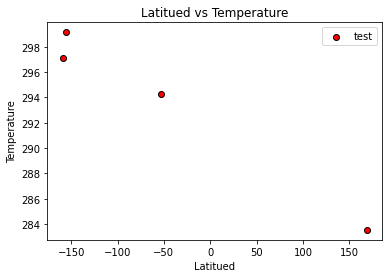

In [10]:
Latitude = clean_city_data["Latitude"]
Temperature = clean_city_data["Temperature"]
##? when to use plt.scatter and when to use df.plot?

#using matplotlib
plt.scatter(Latitude, Temperature, marker="o", facecolors="red", edgecolors="black")
plt.legend(["test"])
plt.xlabel('Latitued')
plt.ylabel('Temperature')
plt.title(('Latitued vs Temperature'))
#            #s=x_axis, alpha=0.75)


plt.show()

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

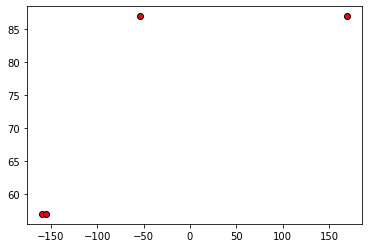

In [11]:
Latitude = clean_city_data["Latitude"]
Humidity = clean_city_data["Humidity"]
##?how do I decide which goes first - latitued or humidity 
plt.scatter(Latitude, Humidity, marker="o", facecolors="red", edgecolors="black")
            #s=x_axis, alpha=0.75)
    
plt.show

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [12]:
#the starter code had from scipy.stats import linregress

w_slope, w_intercept, w_cap_r, w_cap_p, w_cap_std_err = linregress(Latitude, Humidity)


print(w_slope)

0.09092327193524889


In [13]:
#function
# Add the linear regression equation and line to plot
def find_lin_reg(x_values, y_values, title, cordinates):
#x_values = housing_data['RM']
#y_values = housing_data['MEDV']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,cordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()

In [14]:
northern_data = clean_city_data.loc[clean_city_data["Latitude"]>= 0]
southern_data = clean_city_data.loc[clean_city_data["Latitude"]< 0]
southern_data

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Chui,3443061,-53.4616,294.29,87,96,4.58
2,Kapaa,5848280,-159.3190,297.15,57,75,5.14
3,Hilo,5855927,-155.0900,299.15,57,90,3.60


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\rache\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\rache\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\rache\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\rache\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


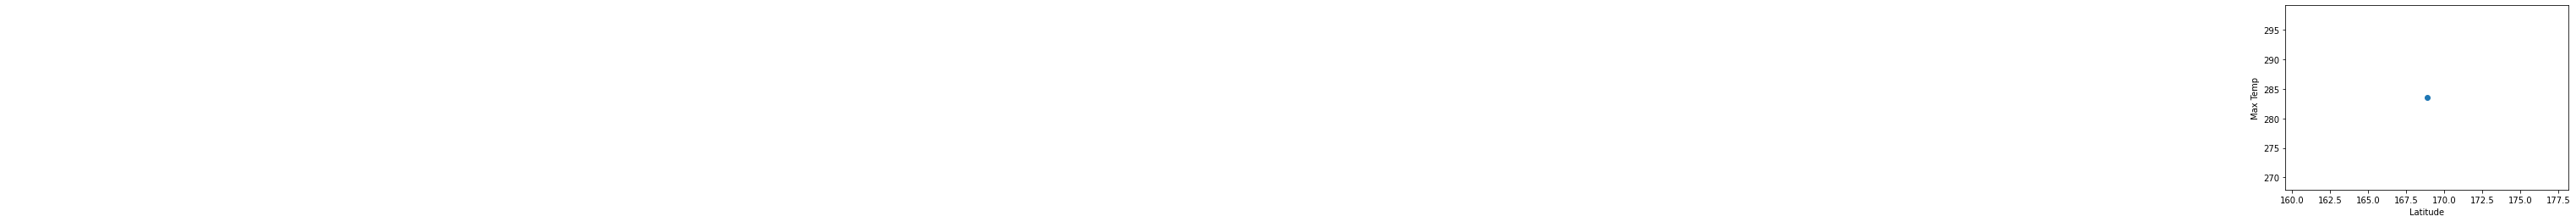

In [15]:
x_values = northern_data["Latitude"]
y_values = northern_data["Temperature"]

find_lin_reg(x_values, y_values,'Max Temp', (10,265))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

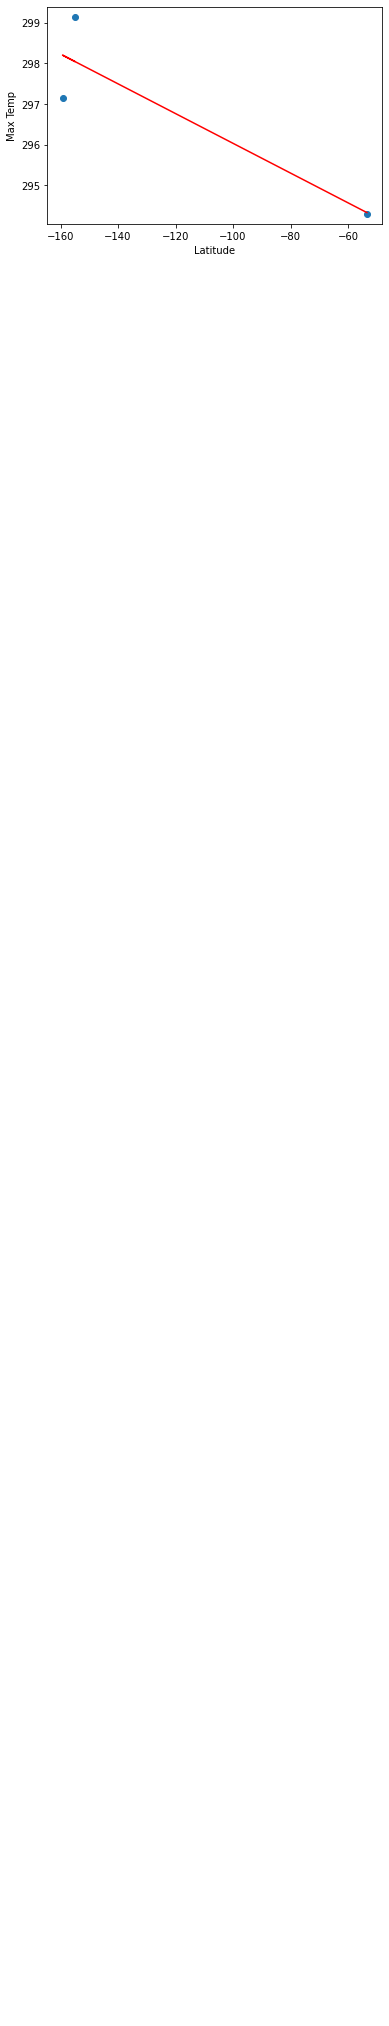

In [16]:
x_values = southern_data["Latitude"]
y_values = southern_data["Temperature"]

find_lin_reg(x_values, y_values,'Max Temp', (-160,250))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression